# Assignment 1


## Part 1 - Visualizing patterns in the data
In this sub-assignment, we recreate some of the plots from Week 2. We look only at the focus-crimes.

For each set of plots below, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (we provided a couple of ideas during class but it's OK to add more).

* First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).
* Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.
* Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.

First up is to load in the dataset (All packages used in this part of the assigment will also be added here)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import calplot

data = pd.read_csv("../Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

data.head()

PdId  IncidntNum  Incident Code       Category  \
0   4133422003074    41334220           3074        ROBBERY   
1   5118535807021    51185358           7021  VEHICLE THEFT   
2   4018830907021    40188309           7021  VEHICLE THEFT   
3  11014543126030   110145431          26030          ARSON   
4  10108108004134   101081080           4134        ASSAULT   

                Descript DayOfWeek        Date   Time PdDistrict Resolution  \
0  ROBBERY, BODILY FORCE    Monday  11/22/2004  17:50  INGLESIDE       NONE   
1      STOLEN AUTOMOBILE   Tuesday  10/18/2005  20:00       PARK       NONE   
2      STOLEN AUTOMOBILE    Sunday  02/15/2004  02:00   SOUTHERN       NONE   
3                  ARSON    Friday  02/18/2011  05:27  INGLESIDE       NONE   
4                BATTERY    Sunday  11/21/2010  17:00   SOUTHERN       NONE   

   ... Fix It Zones as of 2017-11-06  2 2  DELETE - HSOC Zones 2 2  \
0  ...                                NaN                      NaN   
1  ...                                NaN                      NaN   
2  ...                                NaN                      NaN   
3  ...                                NaN                      NaN   
4  ...                                NaN                      NaN   

   Fix It Zones as of 2018-02-07 2 2  \
0                                NaN   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   

  CBD, BID and GBD Boundaries as of 2017 2 2  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   Areas of Vulnerability, 2016 2 2  Central Market/Tenderloin Boundary 2 2  \
0                               NaN                                     NaN   
1                               NaN                                     NaN   
2                               NaN                                     NaN   
3                               1.0                                     NaN   
4                               2.0                                     NaN   

   Central Market/Tenderloin Boundary Polygon - Updated 2 2  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

   HSOC Zones as of 2018-06-05 2 2  OWED Public Spaces 2 2  Neighborhoods 2  
0                              NaN                     NaN              NaN  
1                              NaN                     NaN              NaN  
2                              NaN                     NaN              NaN  
3                              NaN                     NaN             94.0  
4                              NaN                     NaN             32.0  

[5 rows x 35 columns]

### 1.1 Weekday, Month, 24-hour, 168-hour Bar charts:

In [2]:
#Subplots for the focus crimes shown pr day of the week
focuscrimes = list(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

dataCategoryWeekday = {"Category" : data["Category"], "Weekday" : data["DayOfWeek"]}

df = pd.DataFrame(dataCategoryWeekday)
df['Weekday'] = pd.Categorical(df['Weekday'], categories=weekday_order, ordered=True)

grouped = df.groupby(['Category', 'Weekday']).size().reset_index(name='Count')
grouped = grouped.sort_values(by=['Category', 'Weekday'])

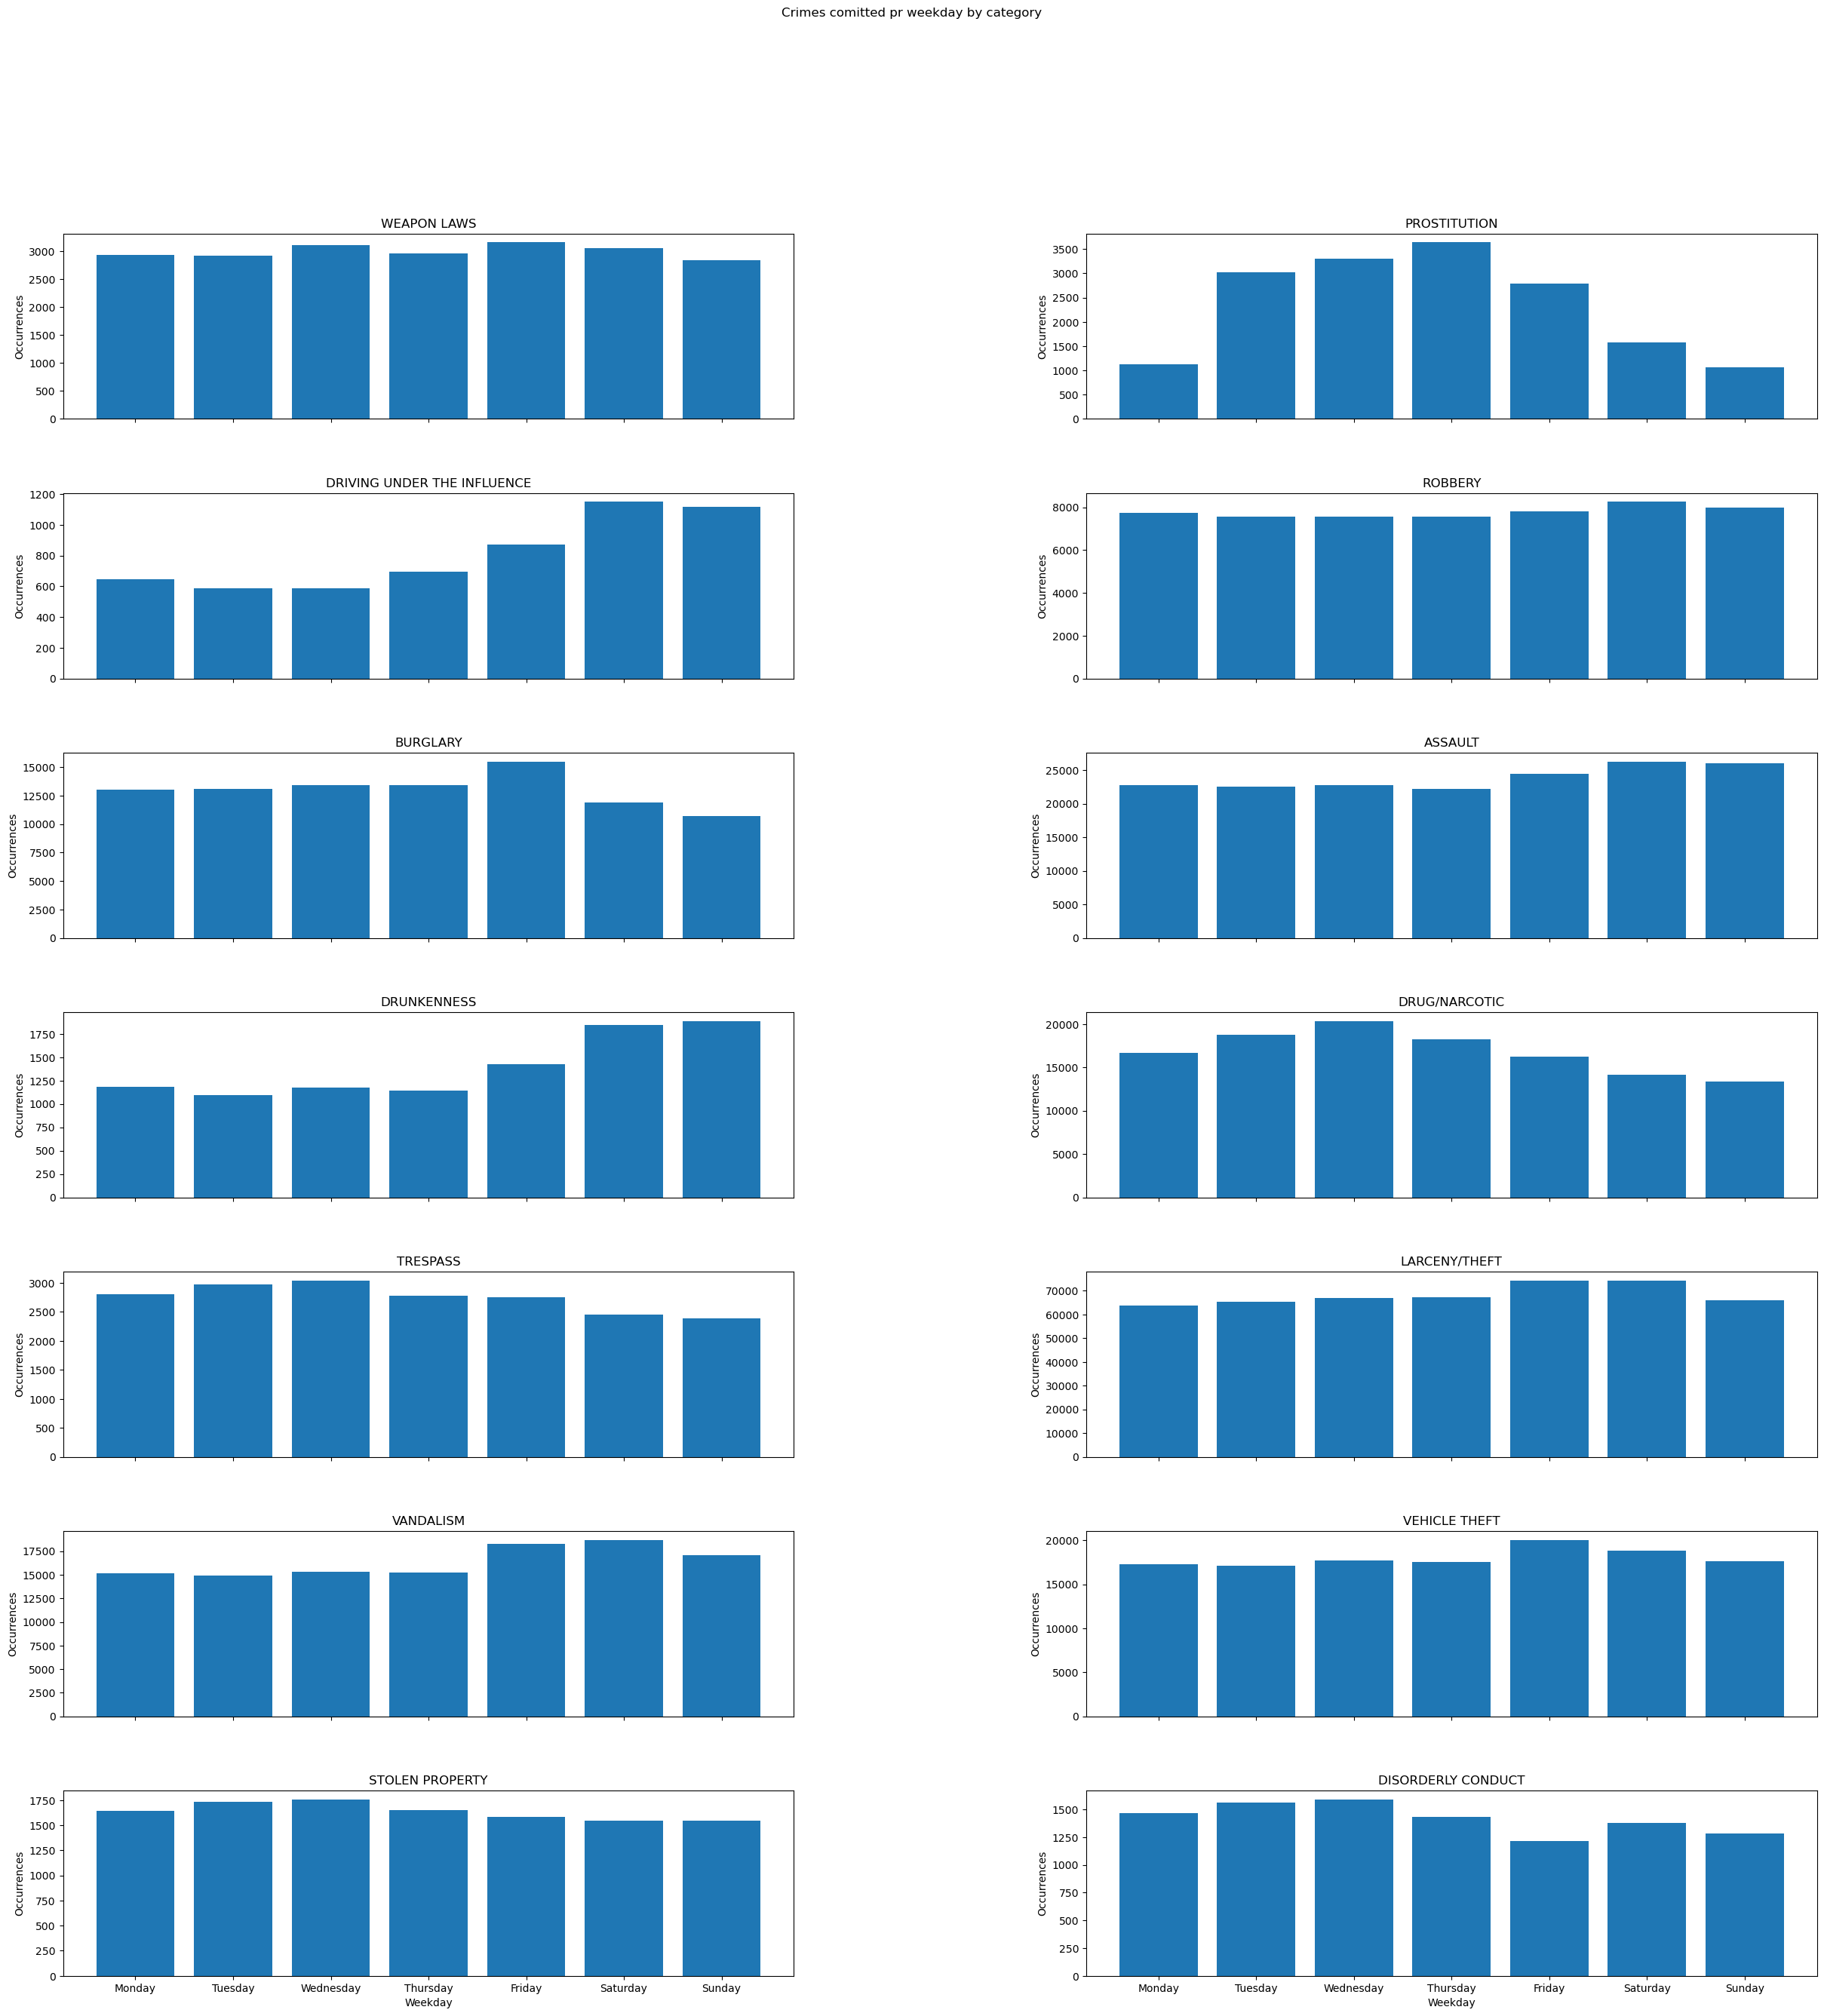

In [3]:
fig, axs = plt.subplots(7, 2, figsize=(30, 30))

k = 0
for i in range(7):
    for j in range(2):
        categoryName = focuscrimes[k]
        rows = grouped[grouped['Category'] == categoryName]
        axs[i,j].bar(np.arange(len(rows)), rows["Count"])
        axs[i,j].set_title(categoryName)
        axs[i,j].set_xticks(np.arange(len(rows)))
        axs[i,j].set_xticklabels("")
        axs[i,j].set_ylabel("Occurrences")
        if i == 6:
            axs[i,j].set_xticklabels(weekday_order)
            axs[i,j].set_xlabel("Weekday")
        k += 1

# Show the plot    
plt.suptitle('Crimes comitted pr weekday by category')
plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)
plt.show()

In the above plots we can see how many cases of each focus group there is pr day of the week. This can give a visualization of which days of the week a crime is most often committed. For most of the bar-charts we can see that the amount of crimes committed are relatively even throughout the week, but some notable exceptions are prostitution which surprisingly seem to most common in the middle of the week, and crimes related to alcohol are most common in the weekends and on Fridays, which would make sense, as this is where most alcohol is consumed.

In [4]:
#Subplots for the focus crimes shown pr month

focuscrimes = list(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

data = data[data["Date"].str.contains("2018") == False]
dataCategoryMonth = data.groupby(['Category', data['Date'].str[:-8]]).size()
month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

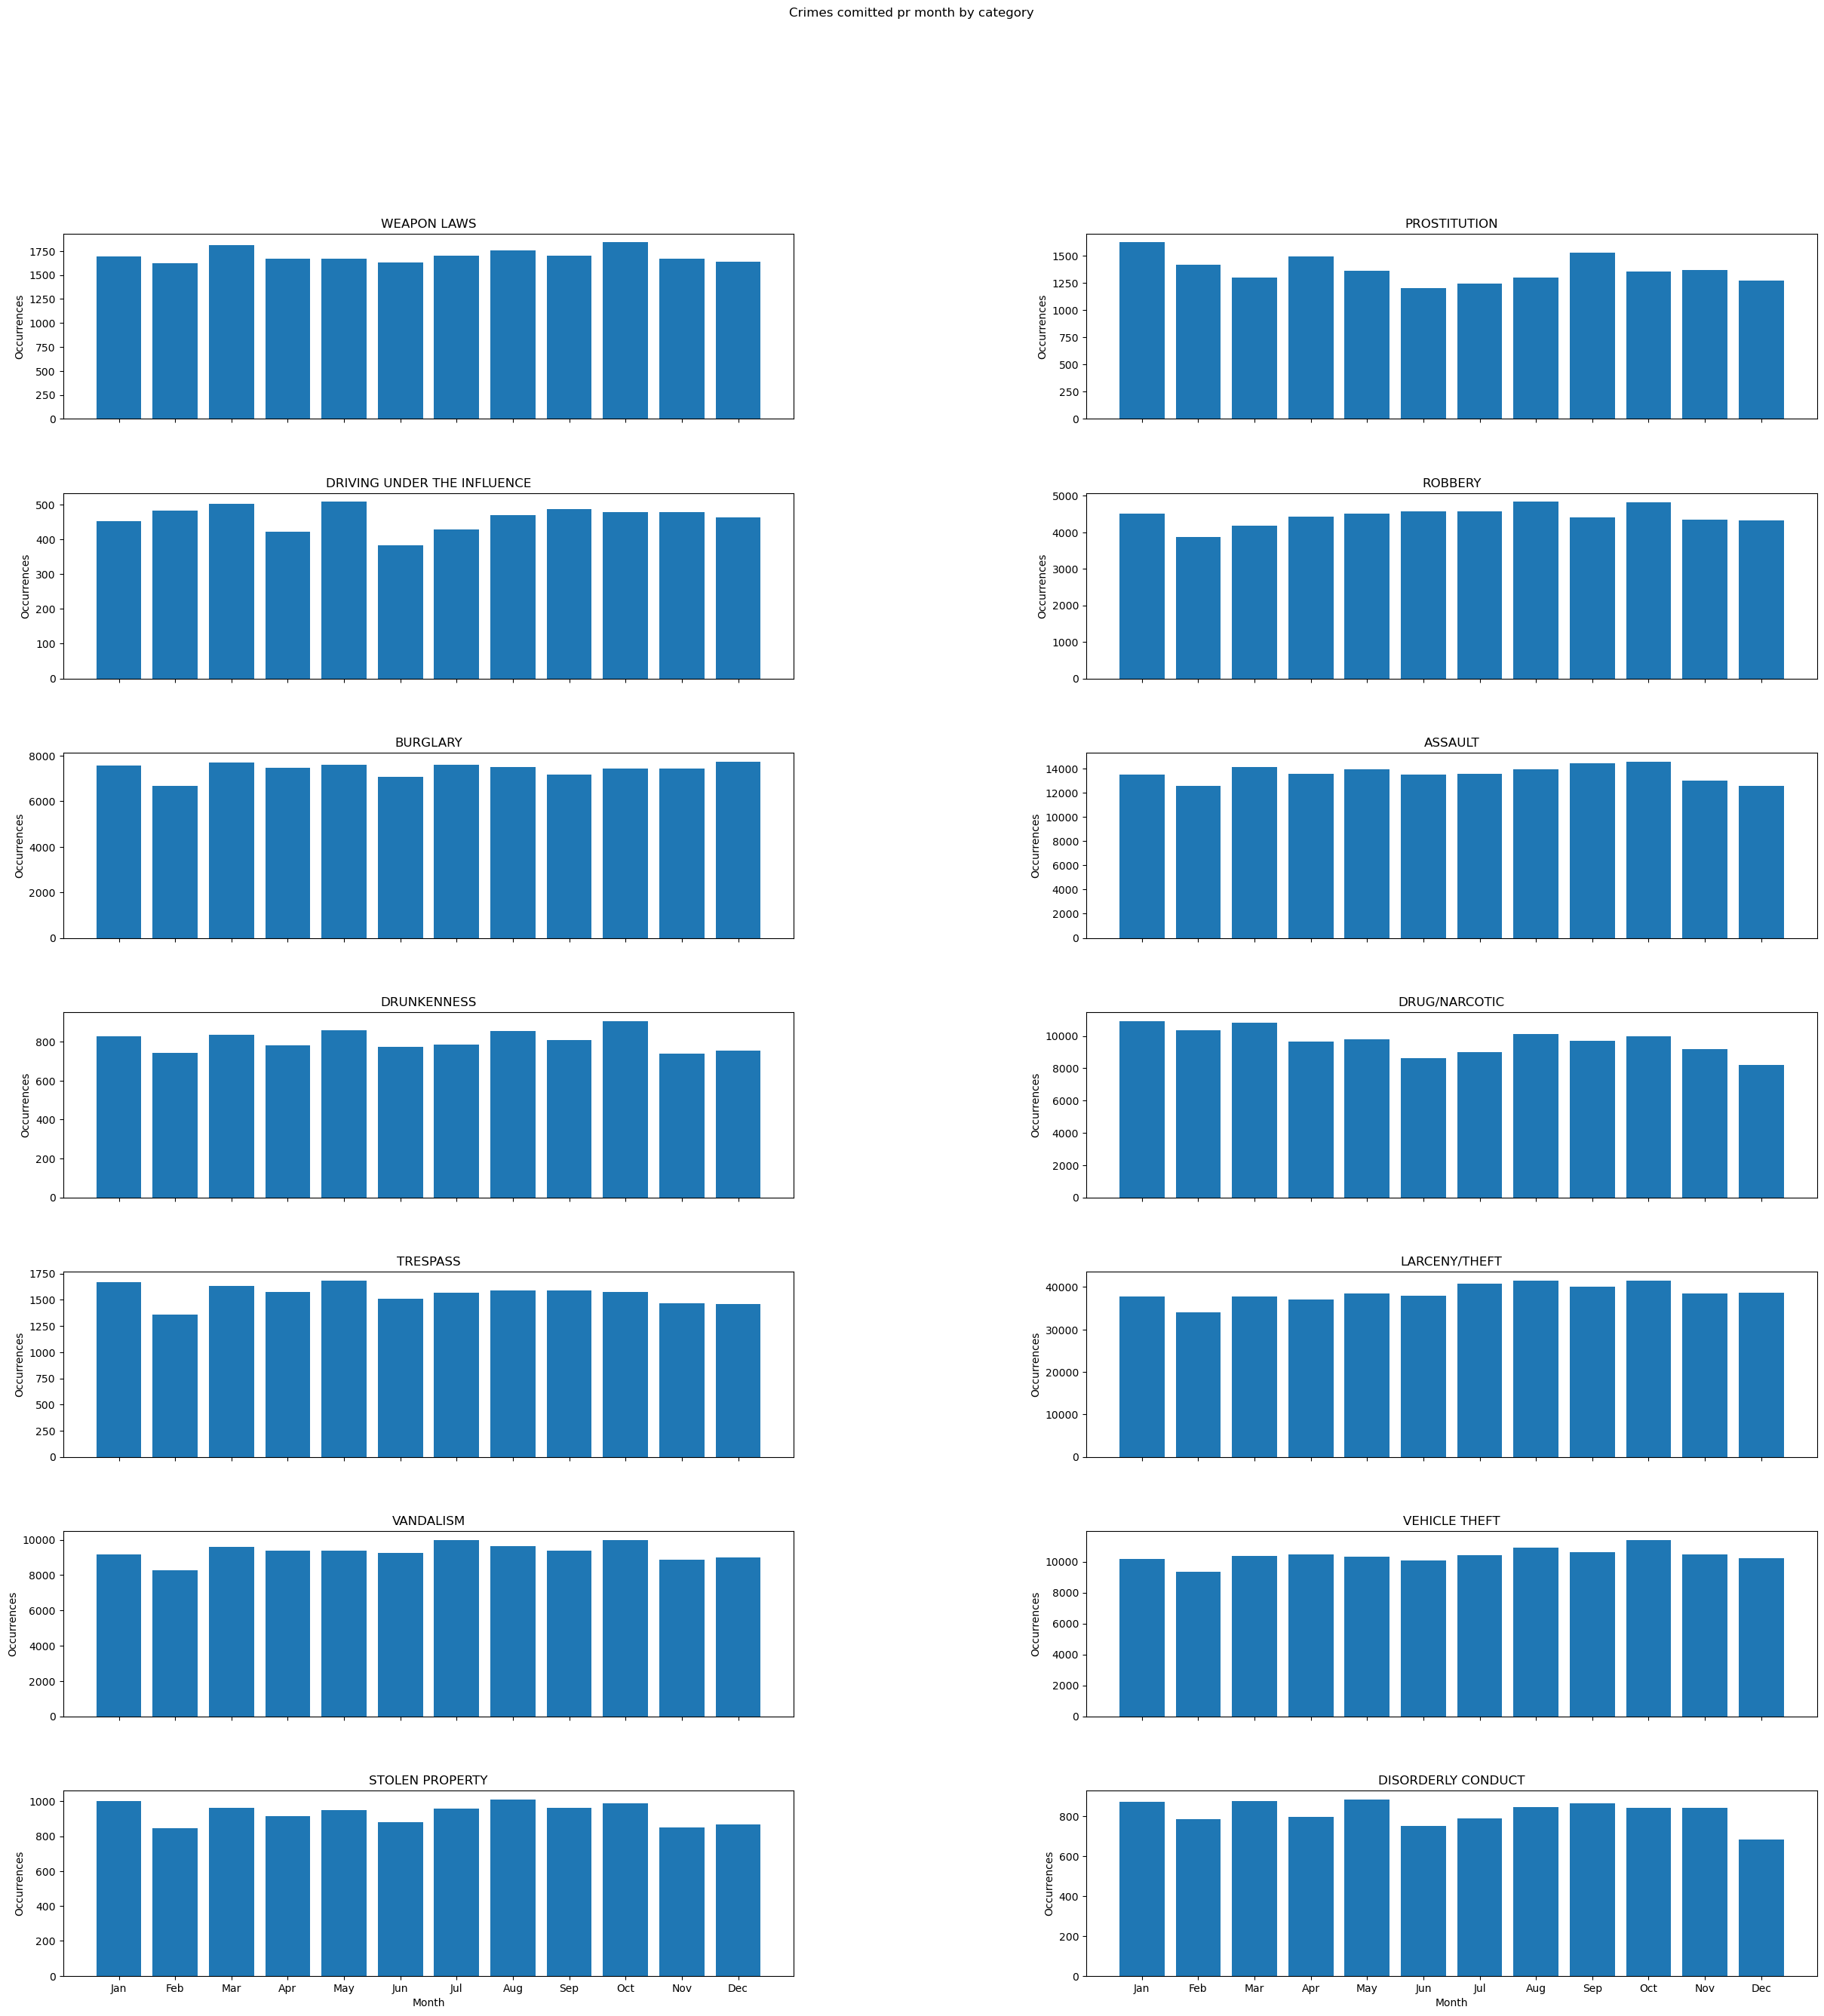

In [5]:
fig, axs = plt.subplots(7, 2, figsize=(30, 30))

k = 0
for i in range(7):
    for j in range(2):
        categoryName = focuscrimes[k]
        axs[i,j].bar(np.arange(len(dataCategoryMonth[categoryName])), dataCategoryMonth[categoryName])
        axs[i,j].set_title(categoryName)
        axs[i,j].set_xticks(np.arange(len(dataCategoryMonth[categoryName])))
        axs[i,j].set_xticklabels("")
        axs[i,j].set_ylabel("Occurrences")
        if i == 6:
            axs[i,j].set_xticklabels(month_labels)
            axs[i,j].set_xlabel("Month")
        k += 1

        
# Show the plot    
plt.suptitle('Crimes comitted pr month by category')
plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)
plt.show()

Not too much is surprising here, the categories are mostly consistent throughout the year. However, it can be seen in multiple categories that there seems to be slightly less criminal activity in June (notably: DUI, Drug/Narcotics, Disorderly conduct, and Prostitution) but overall, all focus crimes seem to happen almost equally over all the months.

In [6]:
#Subplots for the focus crimes shown pr hour of the day

focuscrimes = list(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

#data = data[data["Date"].str.contains("2018") == False]
dataCategoryHour = data.groupby(['Category', data['Time'].str[:-3]]).size()
hour_labels = ["0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8", "8-9", "9-10", "10-11", "11-12", "12-13", "13-14", "14-15", "15-16", "16-17", "17-18", "18-19", "19-20", "20-21", "21-22", "22-23", "23-24"]

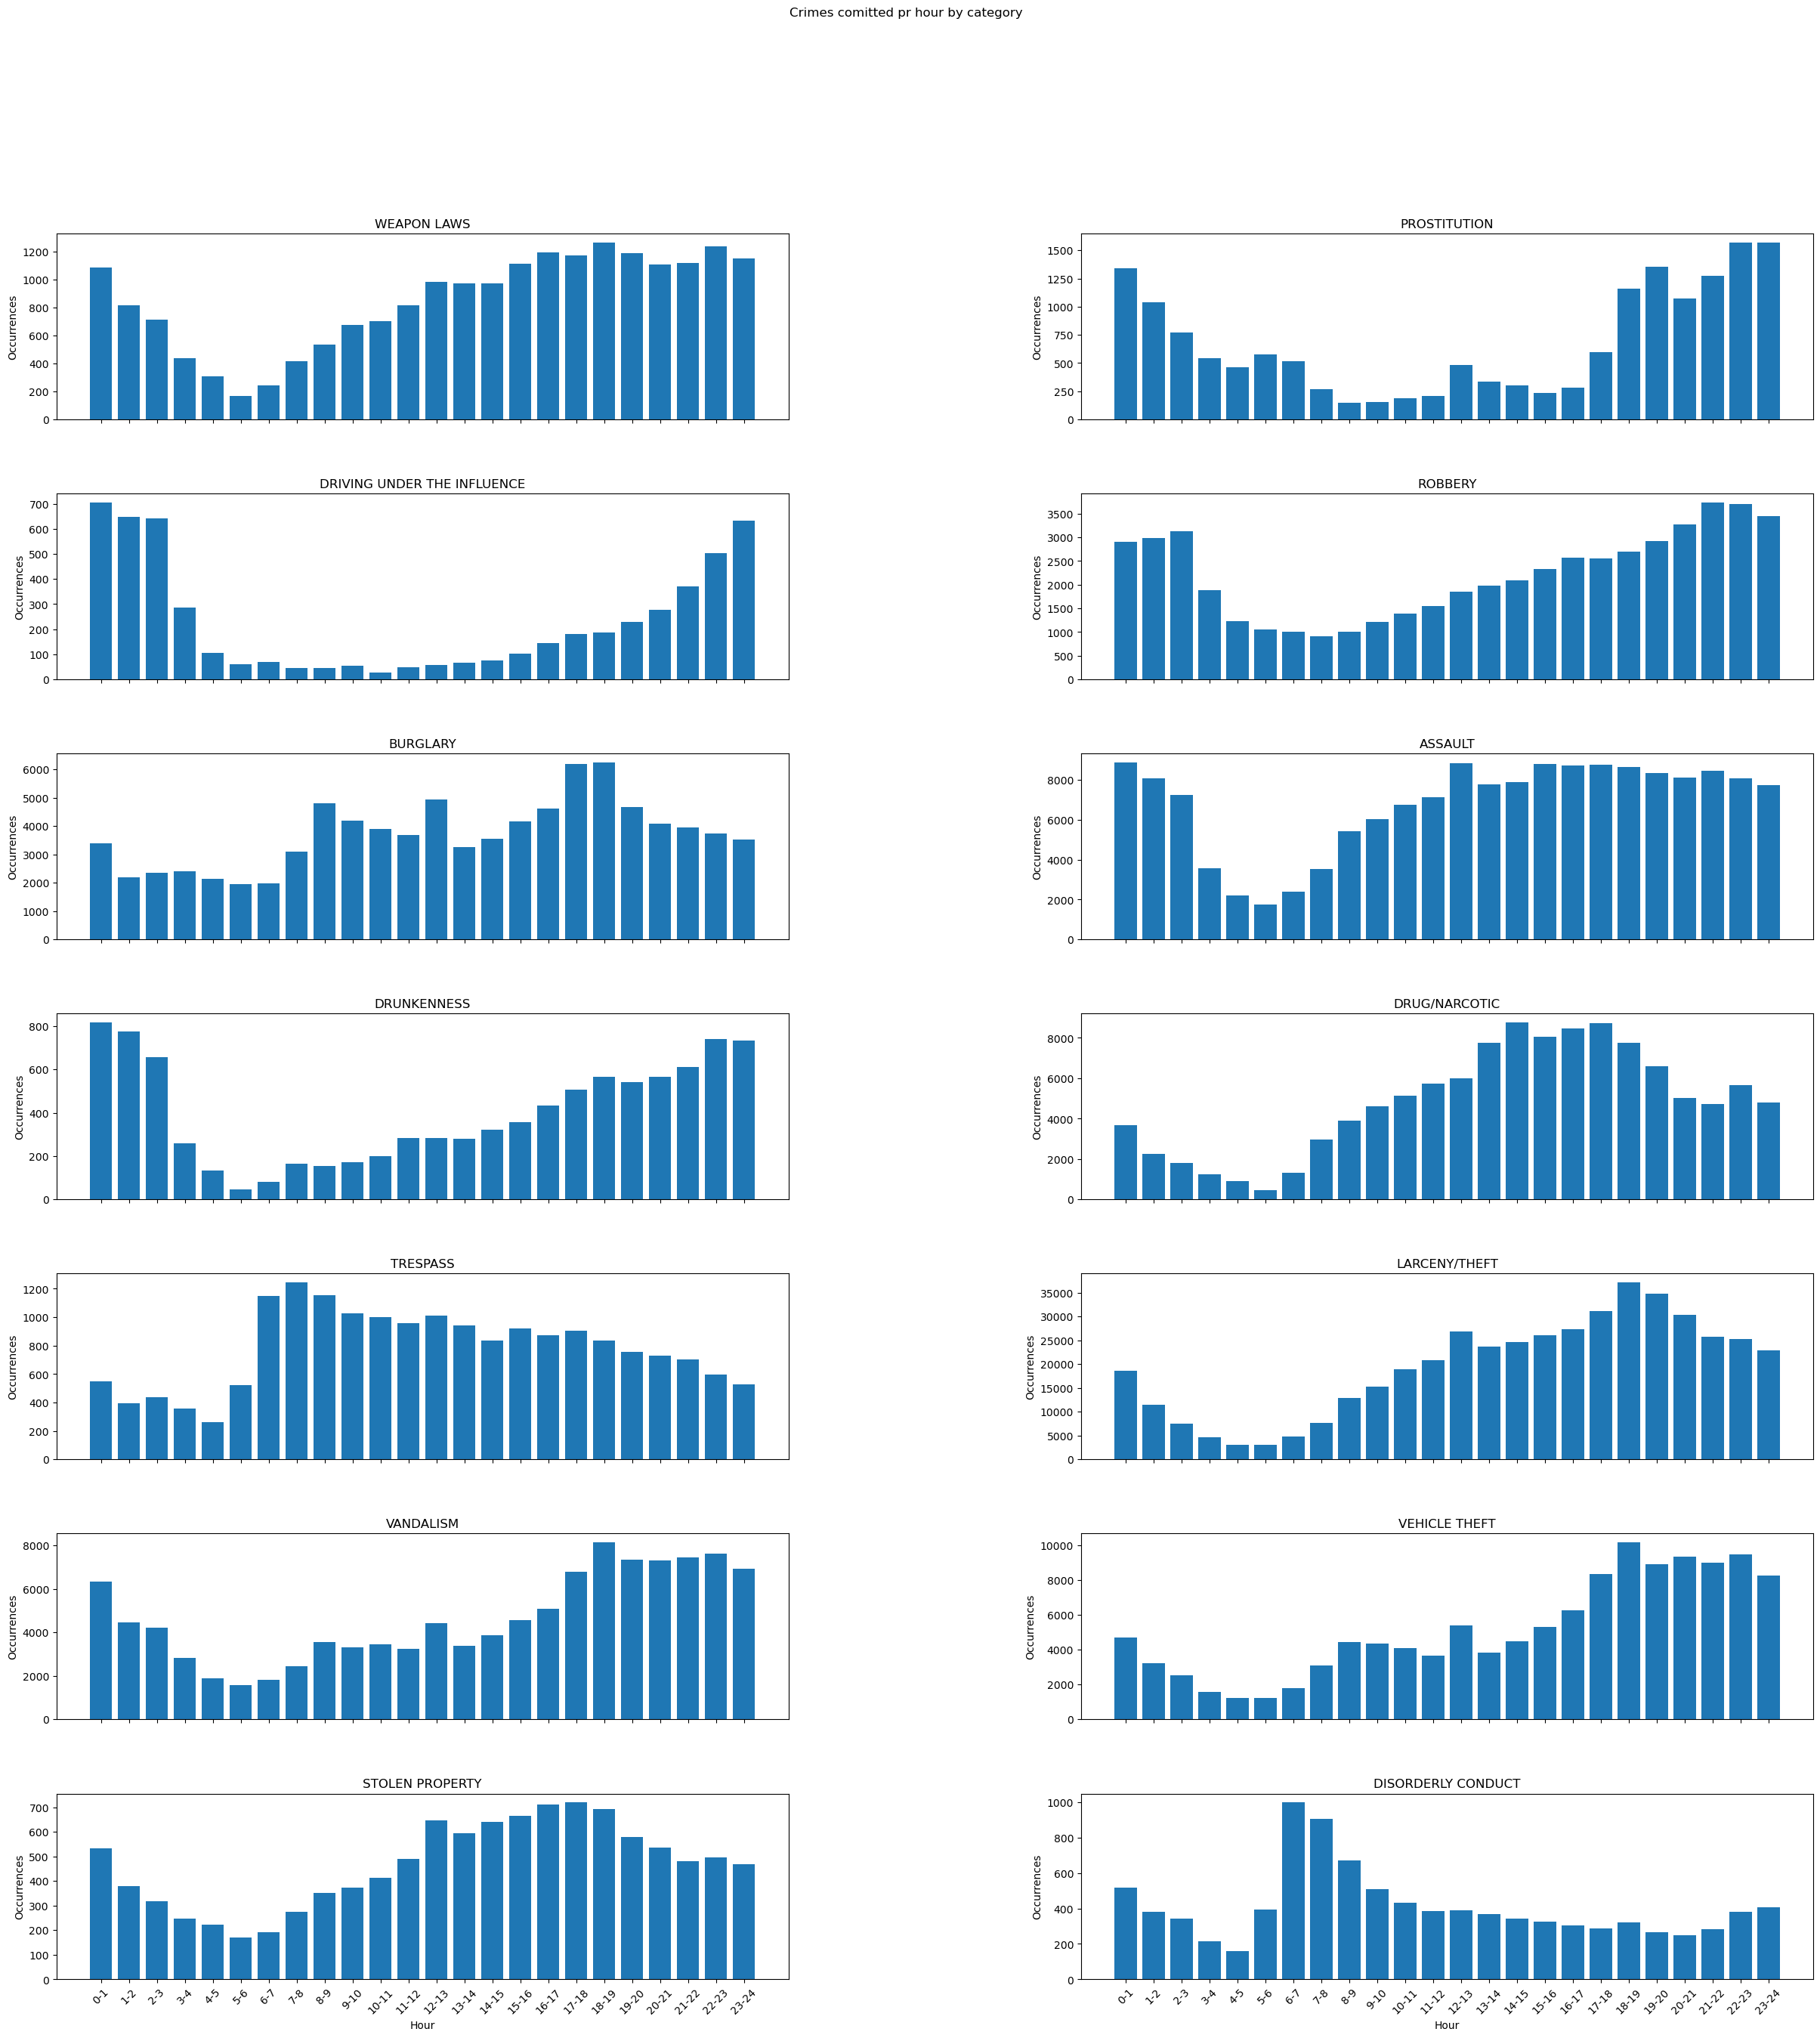

In [7]:
fig, axs = plt.subplots(7, 2, figsize=(30, 30))

k = 0
for i in range(7):
    for j in range(2):
        categoryName = focuscrimes[k]
        axs[i,j].bar(np.arange(len(dataCategoryHour[categoryName])), dataCategoryHour[categoryName])
        axs[i,j].set_title(categoryName)
        axs[i,j].set_xticks(np.arange(len(dataCategoryHour[categoryName])))
        axs[i,j].set_xticklabels("")
        axs[i,j].set_ylabel("Occurrences")
        if i == 6:
            axs[i,j].set_xticklabels(hour_labels, rotation = 45)
            axs[i,j].set_xlabel("Hour")
        k += 1

        
# Show the plot    
plt.suptitle('Crimes comitted pr hour by category')
#plt.xticks(rotation=45)
plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)
plt.show()

Here we can see that a lot more criminal activities takes place in the afternoon/early night, than in the other hours of the day. An exception to this is, however, Disorderly conduct, which we can see has a big spike in cases in the early morning. For almost all crimes we can see that the least activity is in the late night (between ~ 03:00 - 06:00).
A notable category is the DUI where we can see that almost all cases of this category take place between 21-02.

In [8]:
#Subplots for the focus crimes shown pr hour and day of the week
focuscrimes = list(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

dataCategoryWeekday = {"Category" : data["Category"], "Weekday" : data["DayOfWeek"], "Hour" : data["Time"].str[:-3]}

df = pd.DataFrame(dataCategoryWeekday)
df
df['Weekday'] = pd.Categorical(df['Weekday'], categories=weekday_order, ordered=True)

grouped = df.groupby(['Category', 'Weekday', 'Hour']).size().reset_index(name='Count')
grouped = grouped.sort_values(by=['Category', 'Weekday', 'Hour'])

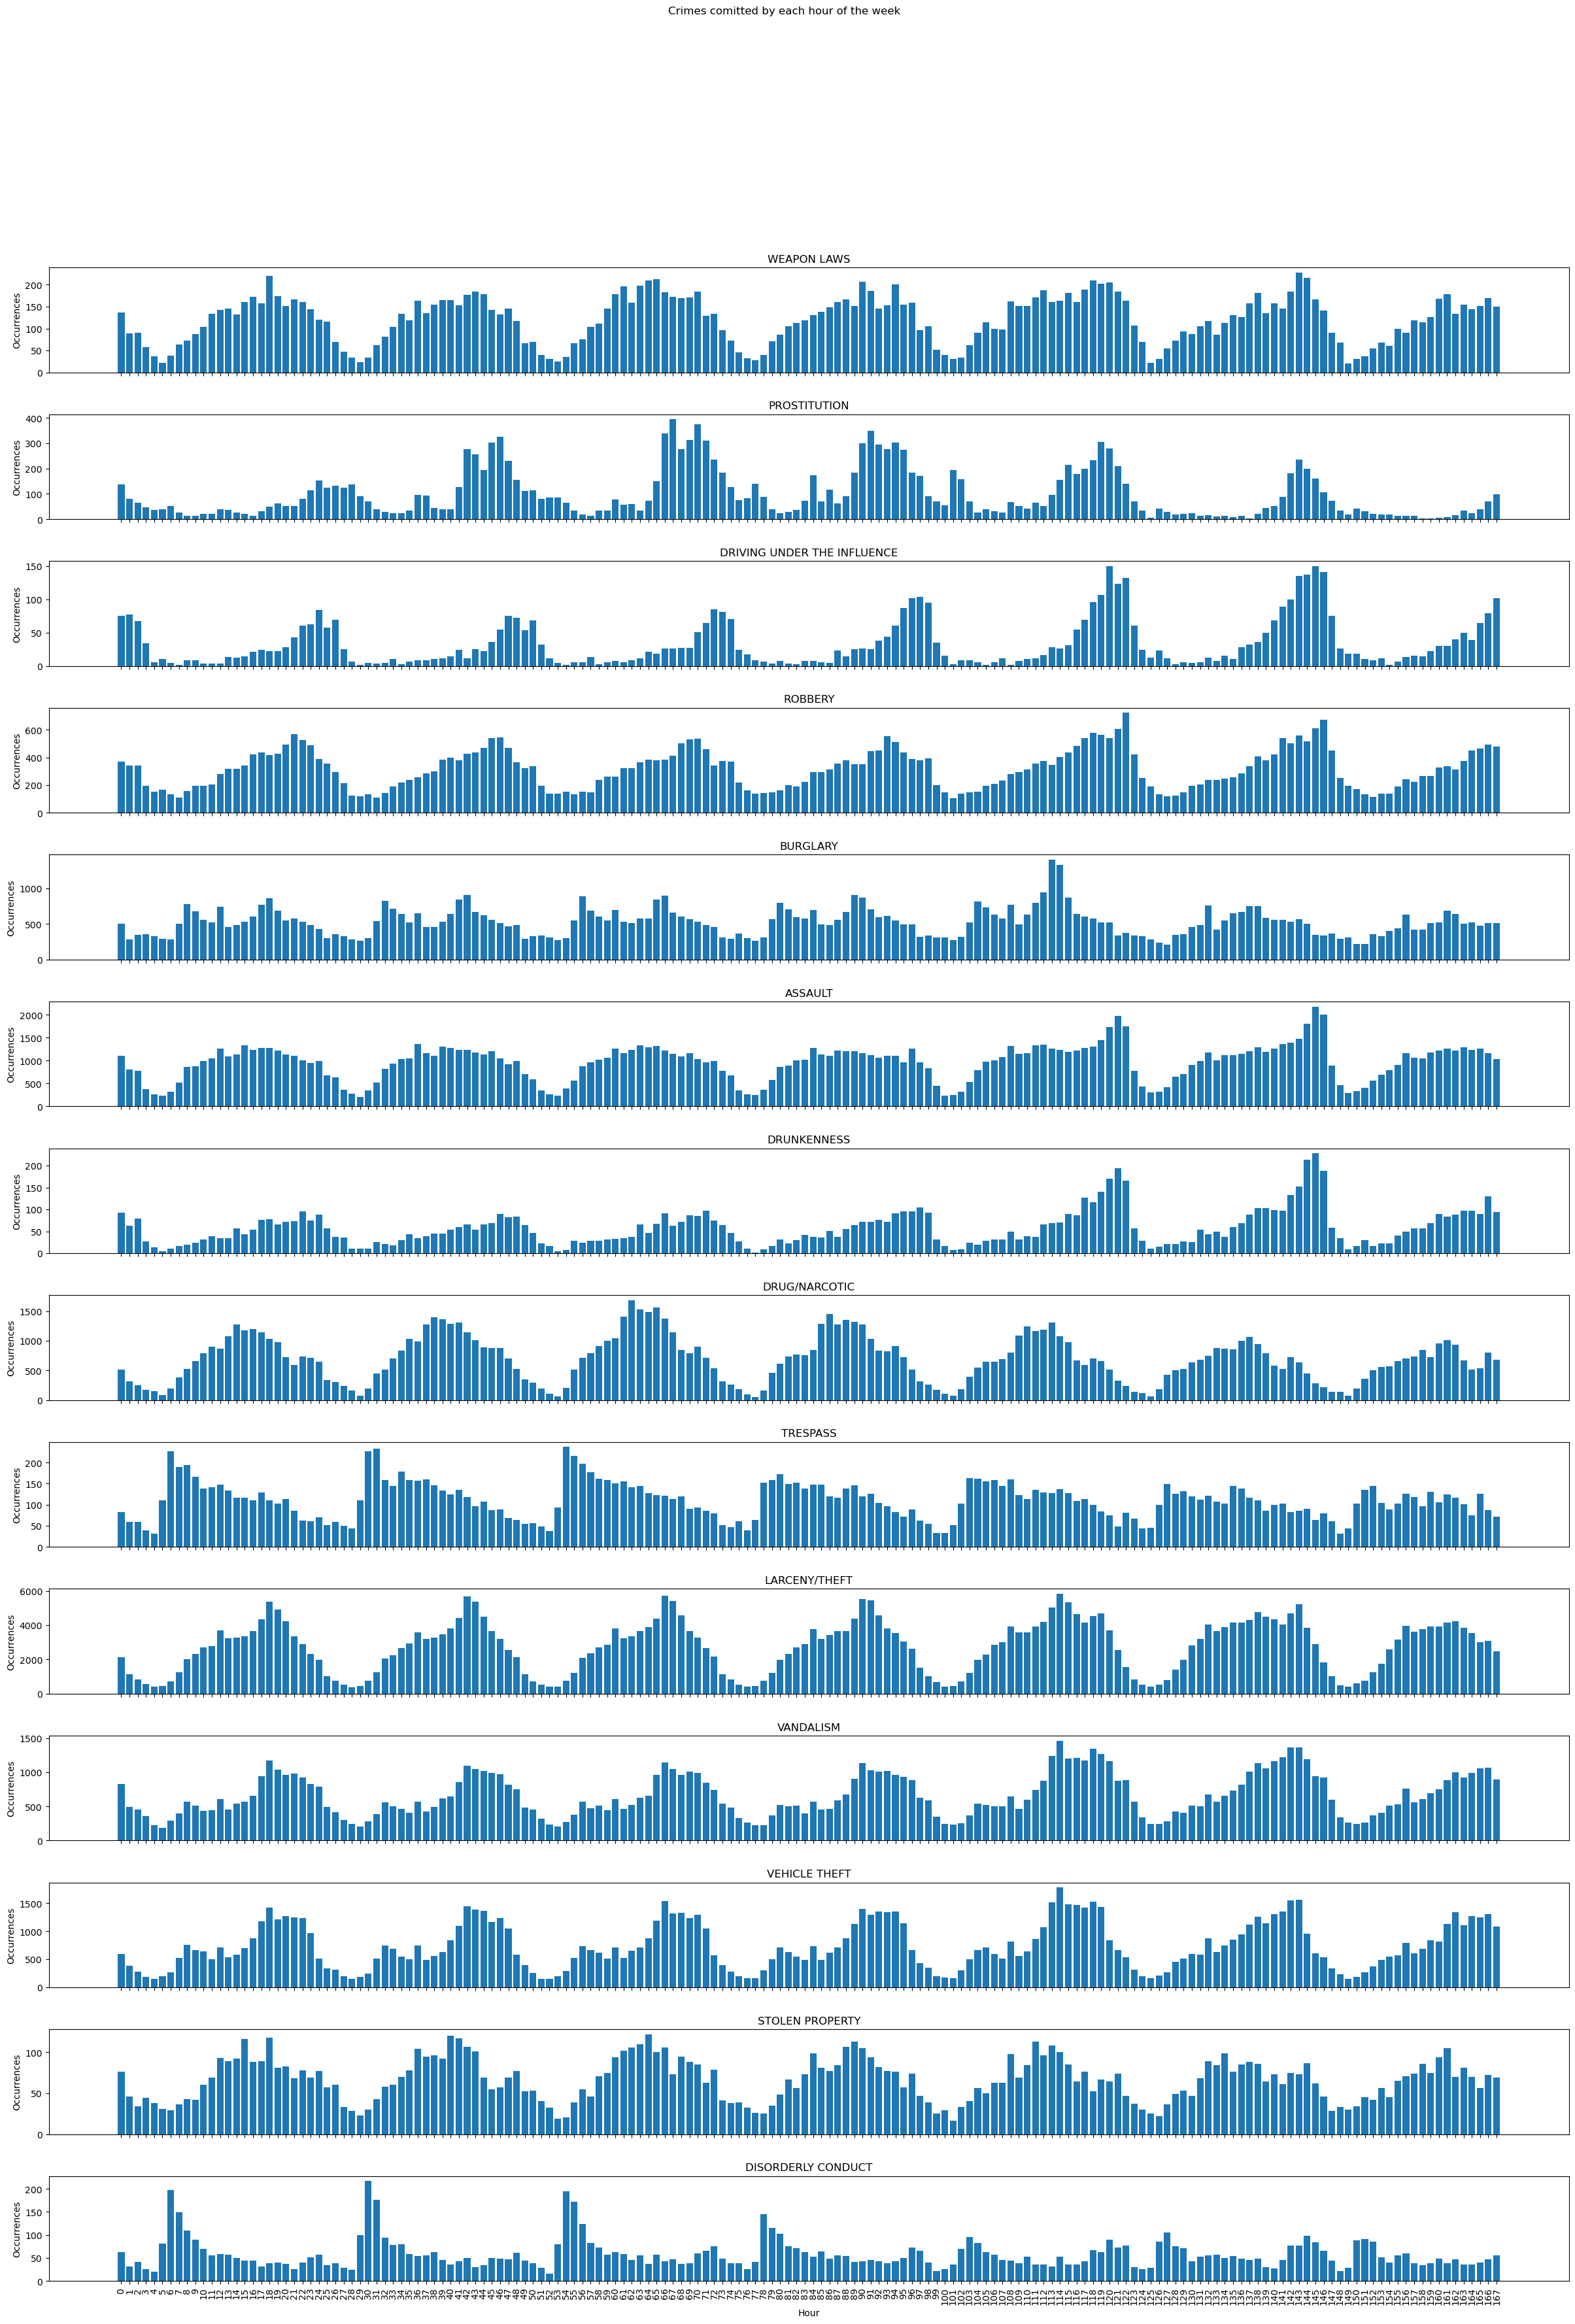

In [9]:
fig, axs = plt.subplots(14, figsize=(30, 40))

k = 0
for i in range(14):
    categoryName = focuscrimes[k]
    rows = grouped[grouped['Category'] == categoryName]
    axs[i].bar(np.arange(len(rows)), rows["Count"])
    axs[i].set_title(categoryName)
    axs[i].set_xticks(np.arange(len(rows)))
    axs[i].set_xticklabels("")
    axs[i].set_ylabel("Occurrences")
    if i == 13:
        axs[i].set_xticklabels(range(0,168), rotation = 90)
        axs[i].set_xlabel("Hour")
    k += 1
                
# Show the plot    
plt.suptitle('Crimes comitted by each hour of the week')
plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)
plt.show()

Lastly for each hour of the week, we can see that the crimes follow a steady pattern for all the days. Notable exceptions are that Disorder Conduct occurs mostly on Monday, Tuesday, and Wednesday mornings. We can again see that alcohol related crimes happen most often in the evenings/nights of Fridays and Saturdays.

### 1.2 Calender Plot

In [10]:
#Calender Plot for DRUG/NARCOTIC comitted in 2015
dataCalMap = data[data["Date"].str.contains("2015") == True]
dataCalMap = dataCalMap[dataCalMap["Category"].str.contains("DRUG/NARCOTIC") == True]
df = dataCalMap
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace = True)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


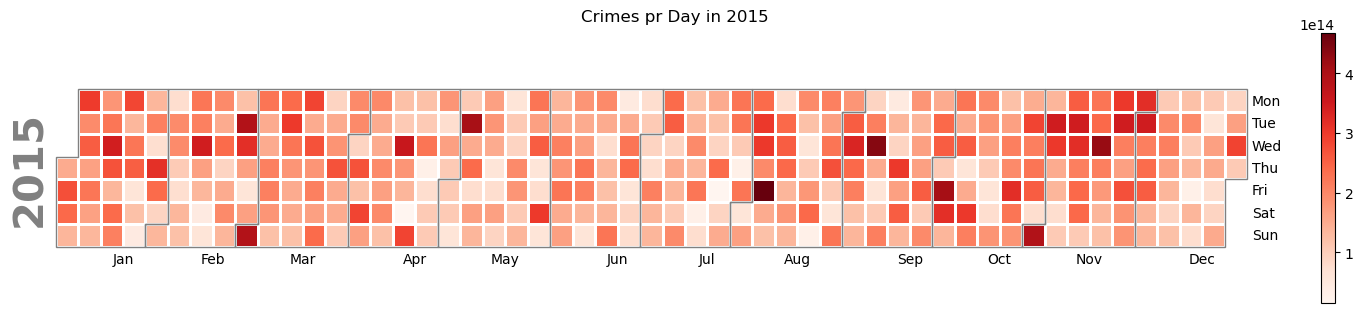

In [11]:
pl1 = calplot.calplot(data = df['PdId'],how = 'sum', cmap = 'Reds', figsize = (16, 3), suptitle = "Crimes pr Day in 2015")

For the Calendar Plot, I've chosen "DRUG/NARCOTIC" crimes committed in 2015, because when looking at the bar-chart over each month, this category seems to have the most variation from month to month. and when plotting this category, we can see that there was a hotspot on the 7th of august and 9th of September, which can be part of the reason why the crime rate jumped up in those months (this is not 100% of the reason though since here we only look at 2015 while the bar chart showed for all the years)

### 1.3 Polar Bar Chart

In [12]:
#Polar Bar Chart for all crimes committed on 4th of july 2015
dataPolCha = data[data["Date"].str.contains("07/04/2015") == True]
dataPolCha = dataPolCha.groupby([dataPolCha['Time'].str[:-3]]).size()
df = pd.DataFrame(dataPolCha)
#b = df.iloc[:,1:].values
df = df[0].to_numpy()

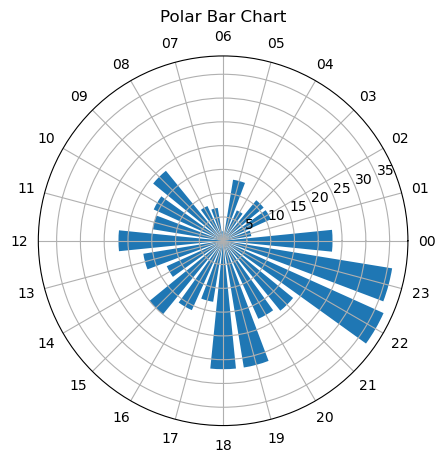

In [13]:
categories = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
values = df

# Convert categories to angles
theta = np.linspace(0, (2*np.pi), len(categories), endpoint=False)

# Make the plot
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
bars = ax.bar(theta, values, width=0.2)

# Set the label and title
ax.set_xticks(theta)
ax.set_xticklabels(categories)
ax.set_title('Polar Bar Chart')

# Show the plot
plt.show()

In the Polar Bar Chart it is clearly shown that most crimes were comitted between 22:00 and midnight

## Part 2 - Dataviz questions
Have a look at the encoding dataviz lecture (Week 4), then answer the following questions in your own words.
* Mention 10 examples of ways we can encode data.
* Are all encodings created equally? Why not? Can you think of an example from the previous lectures?
* Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?
* Explain in your own words: What is the problem with pie-charts?

1. Position, length, area, volume, shape, color, angle, line weight, line ending, texture pattern. <br /> <br />
2. No, some encodings are good at showing some aspect of data, while other encodings might not be as good with showing that same data. For instance line-weight was used in week two Exercise 1 to show the linear regression in the 4 datasets<br /> <br />
3. Position is an encoding that can be difficult to see with the human eye. two positions places a km apart, has very close lat/lon coordinates, but on a map with the right zoom level, it can be clear to see thair distance from each other. <br />
Length can also be difficult to see in its raw format. Fx the length of crimes committed by the hour in a whole week, as was done in week 2. making bar charts of the data, made it much more visible. <br /> <br />
4. The problem with Pie-Charts are that data with very close values, might seem identical on a Pie-Chart, while they actually are different.

## Part 3 - Visualizing geodata using Plotly
In this sub-assignment I want you to create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays, following the instructions from Week 3.

When you're done, reflect on the following questions.

* Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?
* Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):
    * Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?
    * Why do you think perceptual errors are a problem? Try to think of a few examples.

First up is to load in the dataset (All packages used in this part of the assigment will also be added here)

In [14]:
from urllib.request import urlopen
import json
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    districts = json.load(response)

data = pd.read_csv("../Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
data.head()    

PdId  IncidntNum  Incident Code       Category  \
0   4133422003074    41334220           3074        ROBBERY   
1   5118535807021    51185358           7021  VEHICLE THEFT   
2   4018830907021    40188309           7021  VEHICLE THEFT   
3  11014543126030   110145431          26030          ARSON   
4  10108108004134   101081080           4134        ASSAULT   

                Descript DayOfWeek        Date   Time PdDistrict Resolution  \
0  ROBBERY, BODILY FORCE    Monday  11/22/2004  17:50  INGLESIDE       NONE   
1      STOLEN AUTOMOBILE   Tuesday  10/18/2005  20:00       PARK       NONE   
2      STOLEN AUTOMOBILE    Sunday  02/15/2004  02:00   SOUTHERN       NONE   
3                  ARSON    Friday  02/18/2011  05:27  INGLESIDE       NONE   
4                BATTERY    Sunday  11/21/2010  17:00   SOUTHERN       NONE   

   ... Fix It Zones as of 2017-11-06  2 2  DELETE - HSOC Zones 2 2  \
0  ...                                NaN                      NaN   
1  ...                                NaN                      NaN   
2  ...                                NaN                      NaN   
3  ...                                NaN                      NaN   
4  ...                                NaN                      NaN   

   Fix It Zones as of 2018-02-07 2 2  \
0                                NaN   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   

  CBD, BID and GBD Boundaries as of 2017 2 2  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   Areas of Vulnerability, 2016 2 2  Central Market/Tenderloin Boundary 2 2  \
0                               NaN                                     NaN   
1                               NaN                                     NaN   
2                               NaN                                     NaN   
3                               1.0                                     NaN   
4                               2.0                                     NaN   

   Central Market/Tenderloin Boundary Polygon - Updated 2 2  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

   HSOC Zones as of 2018-06-05 2 2  OWED Public Spaces 2 2  Neighborhoods 2  
0                              NaN                     NaN              NaN  
1                              NaN                     NaN              NaN  
2                              NaN                     NaN              NaN  
3                              NaN                     NaN             94.0  
4                              NaN                     NaN             32.0  

[5 rows x 35 columns]

### 3.1 Cloropleth Map

In [15]:
#Geoplot for Car thefts on a sunday
dataCar = data[data["DayOfWeek"].str.contains("Sunday") == True]
dataCar = dataCar[dataCar["Category"].str.contains("VEHICLE THEFT") == True]
dataCar = dataCar['PdDistrict'].value_counts().sort_values(ascending=False)

df = pd.DataFrame(list(dataCar.items()), columns=['District', 'Car Thefts'])

In [16]:
fig = px.choropleth_mapbox(df, geojson=districts, locations='District', color='Car Thefts',
                           color_continuous_scale="Viridis",
                           range_color=(0, 3000),
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat": 37.77, "lon": -122.40},
                           opacity=0.5,
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

From this map it can be seen that Tenderloin is the area with the least amount of car thefts, with a total of 356.
Ingleside, on the other hand, is the area with most car thefts, with a total of 2846.
So, based on this data it would seem to be safest to park in Tenderloin on a Sunday, and least safe to park in Ingleside.
But it is also important to mention that Tenderloin is a much smaller district than Ingleside, so of course there will be less car thefts in that area.

### 3.2 Perceptual Error

We must be careful when regarding the visual representation of data like the map above. If fx. we change the color range from 0-3000 to say 0-10000 the result would look much different.

In [17]:
fig = px.choropleth_mapbox(df, geojson=districts, locations='District', color='Car Thefts',
                           color_continuous_scale="Viridis",
                           range_color=(0, 10000),
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat": 37.77, "lon": -122.40},
                           opacity=0.5,
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Now it appears that your car is more or less equally likely to be stolen in each district.

Perceptual Errors can be problematic because they skew with our interpretation of data. <br />
A frequent occurrence of this is in bar-charts where the ranges on the y-axis doesn't start at 0. so fx there might be two values with a height of 55 and 56, and then the y-axis are in the range (54-56) this would make it look like a difference of almost double between the two, while in reality they are very close together.

## Part 4 - Errors in the data
We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data (listed in Part 3 of Week 4).

The data errors we discovered at the end of Week 4 become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when binning the data. We explore this process in the exercise below.

* In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data.
* Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).
* Find your own example of human noise in the data and visualize it.

### 4.1 binning bias

* For the first example, by binning by days of the week, Thursday will seem much larger. By not noticing this error, it might seem that there is a lot more prostitution in SF than there really is.
* For the second example, by binning by fx every 10 minutes, it will look like there are a lot more crimes happening in the bins containing XX:00 and XX:30. This can make it look like SF is a much more dangerous place on the hour/half hour than on other times in between.
* For the Third example, by binning by some area size, it will appear that some areas are more dangerous for certain crimes than they really are (and vice versa, some areas can appear safer than they are) This can give a skewed view of the safe/unsafe areas of the city.

### 4.2 Other Human Noise in the Data

In the following i have created an example using the robbery category, over the weekdays.

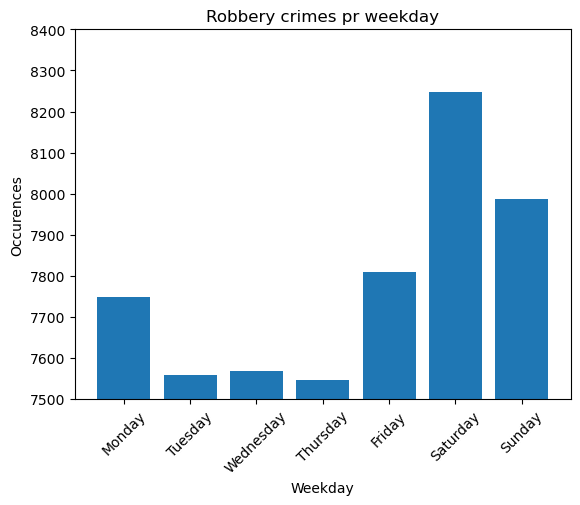

In [18]:
#Barplot for the ROBBERY category pr weekday, but with the y-axis starting at 7500
focuscrimes = list(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

dataCategoryWeekday = {"Category" : data["Category"], "Weekday" : data["DayOfWeek"]}

df = pd.DataFrame(dataCategoryWeekday)
df['Weekday'] = pd.Categorical(df['Weekday'], categories=weekday_order, ordered=True)

grouped = df.groupby(['Category', 'Weekday']).size().reset_index(name='Count')
grouped = grouped.sort_values(by=['Category', 'Weekday'])
grouped = grouped[grouped["Category"].str.contains("ROBBERY") == True]

plt.bar(grouped["Weekday"], grouped["Count"])
plt.xlabel('Weekday')
plt.ylabel('Occurences')
plt.xticks(rotation = 45)
plt.title('Robbery crimes pr weekday')
plt.ylim(bottom=7500)
plt.ylim(top=8400)

plt.show()

When making a bar plot like this, it would at first glance appear that there are barely any robberies on Tuesdays, Wednesdays, and Thursdays, while there are many times more robberies on Saturdays. This is not the case however since the occurrence count starts at 7500, and thus gives a skewed picture of the difference from weekday to weekday. In the bar plot below (where the occurrence count starts at 0) we can more clearly see the difference for each weekday (and that there isn’t that much difference)

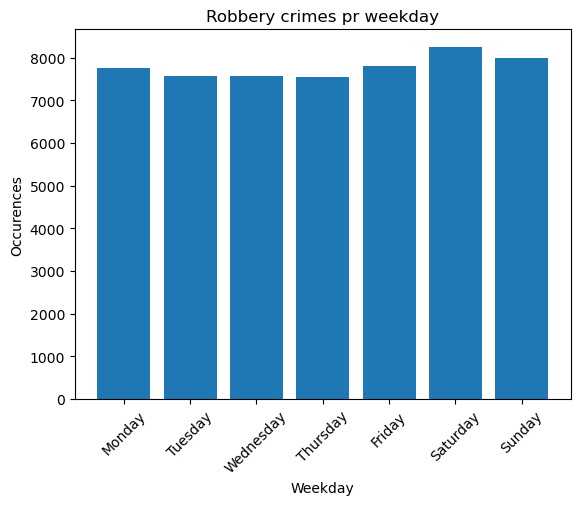

In [19]:
plt.bar(grouped["Weekday"], grouped["Count"])
plt.xlabel('Weekday')
plt.ylabel('Occurences')
plt.xticks(rotation = 45)
plt.title('Robbery crimes pr weekday')

plt.show()